# Centering and Decorrelation and Whitening




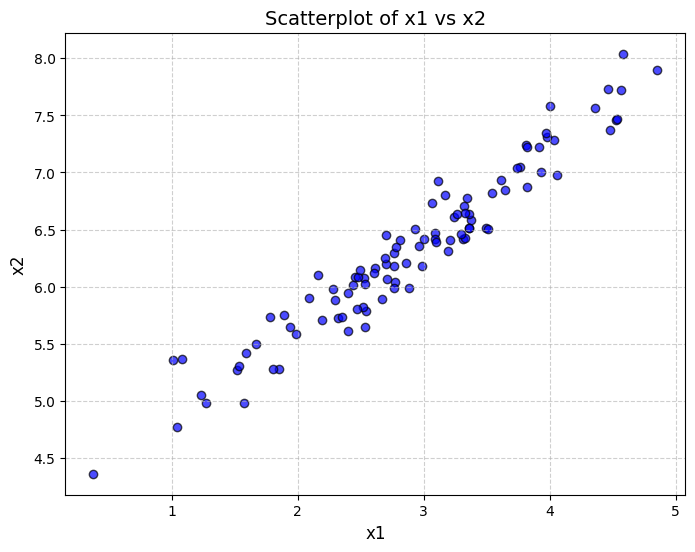

Mean of x1: 2.8961534826059054
Mean of x1: 6.3213837034947105


In [4]:
# the data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
size = 100
x1 = np.random.normal(3, 1, size)
x2 = 0.8 * x1 + np.random.normal(4, 0.2, size)
data = pd.DataFrame({'x1': x1, 'x2': x2})
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'], data['x2'], alpha=0.7, color='blue', edgecolor='k')
plt.title('Scatterplot of x1 vs x2', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

mean_x1 = data["x1"].mean()
mean_x2 = data["x2"].mean()

print(f"Mean of x1: {mean_x1}")
print(f"Mean of x1: {mean_x2}")



# Centering
- Centering is subtracting the mean from each datapoint s.t. the emprical average for each feature is 0

Mean of x1: 6.883382752675971e-16
Mean of x1: -6.217248937900876e-16


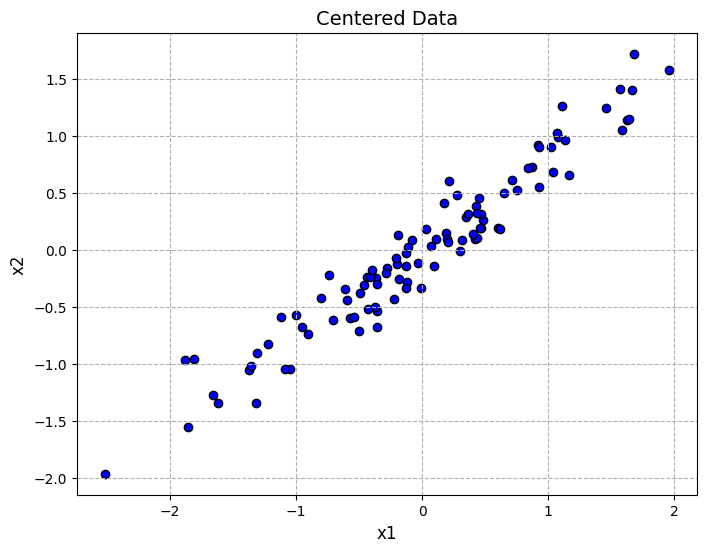

In [15]:
def center_data_point(point : float, avg : float) -> float:
          return point - avg

def center_data_frame(data : pd.DataFrame, f ) -> pd.DataFrame:
     new_frame = data.copy(deep=True)
     for col in new_frame.columns:
          col_mean = new_frame[col].mean()
          new_frame[col] = new_frame[col].apply(f, args=(col_mean,))

     return new_frame

centered_df = center_data_frame(data, center_data_point)
mean_x1_centered = centered_df["x1"].mean()
mean_x2_centered = centered_df["x2"].mean()

print(f"Mean of x1: {mean_x1_centered}")
print(f"Mean of x1: {mean_x2_centered}")

plt.figure(figsize=(8, 6))
plt.scatter(centered_df['x1'], centered_df['x2'], color='blue', edgecolor='k')
plt.title('Centered Data', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()




In [16]:
# Decorrelation of the data

import numpy as np

lenght = len(centered_df)
print(lenght)
np_arr_centered = centered_df.to_numpy()

covariance_matrix = 1/ lenght * np.dot(np_arr_centered, np_arr_centered.T)

print(covariance_matrix)





100
[[ 0.00397889 -0.00043072  0.00553244 ...  0.00280532  0.00083638
  -0.00143654]
 [-0.00043072  0.00014669 -0.00087206 ... -0.0004951  -0.00014706
   0.00043709]
 [ 0.00553244 -0.00087206  0.00843826 ...  0.0044232   0.00131725
  -0.0027661 ]
 ...
 [ 0.00280532 -0.0004951   0.0044232  ...  0.00234408  0.00069782
  -0.00155149]
 [ 0.00083638 -0.00014706  0.00131725 ...  0.00069782  0.00020774
  -0.00046102]
 [-0.00143654  0.00043709 -0.0027661  ... -0.00155149 -0.00046102
   0.00131099]]
